In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../..")

import torch
import torch.nn as nn
from src.data import make_dataset
from pathlib import Path

Read page 53 from the book for some context how to use this

In [2]:
datadir = Path("../../data/raw/")
train_dataloader, test_dataloader = make_dataset.get_MNIST(datadir, batch_size=64) 

In [3]:
from src.models import imagemodels

model = imagemodels.NeuralNetwork(10, 512, 256)
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer.param_groups[0]["lr"]

0.001

In [4]:
from src.models import train_model

log_lr, losses = train_model.find_lr(
    model=model,
    loss_fn=loss_fn,
    optimizer=optimizer,
    data_loader=train_dataloader,
)


 66%|██████▋   | 622/938 [00:06<00:03, 91.62it/s]


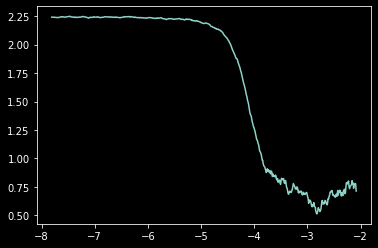

In [5]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(log_lr[10:], losses[10:])